In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp


In [3]:
def objective1(x):
    dim = len(x)
    return 1 - exp(-sum([(x[i] - (1 / (dim**0.5)))**2 for i in range(dim)]))


def objective2(x):
    dim = len(x)
    return 1 - exp(-sum([(x[i] + (1 / (dim**0.5)))**2 for i in range(dim)]))

# Параметры генетического алгоритма
crossover_rate = 0.7
crossover_parametr = 3
mutation_rate = 0.01
mutation_parametr = 4

population_size = 100
dimensions = 3
generations = 15


# Диапазон значений переменных
x_min, x_max = -4, 4


In [9]:
def initialize_population(size, dimensions):
    return list(np.random.rand(size, dimensions))

def select_sorted_items(population, num_to_select):
    selected_indices = np.random.choice(range(len(population)), size=num_to_select*2 if len(population) >= num_to_select*2 else len(population), replace=False)
    selected = np.array(population, dtype=object)[selected_indices]

    fronts = FNDS(selected)
    selected = []
    for front in fronts:
        if len(front) == 0:
            continue
        dists = CDA(front)
        selected.extend([np.array(j[0]) for j in sorted(dists.items(), key=lambda x:x[1], reverse=True)])
        if len(selected) >= num_to_select:
            break
    return selected[:num_to_select]

def get_beta(crossover_parametr):
    u = np.random.rand()
    if u <= 0.5:
        return (2 * u) ** (1 / (crossover_parametr + 1))
    else:
        return (1 / (2 * (1 - u))) ** (1 / (crossover_parametr + 1))

def get_delta(mutation_parametr):
    r = np.random.rand()
    if r < 0.5:
        return (2 * r) ** (1 / (mutation_parametr + 1)) - 1
    else:
        return 1 - (2 * (1 - r)) ** (1 / (mutation_parametr + 1))

def crossover(parent1, parent2, crossover_parametr=np.random.randint(1, 100)):
    child1, child2 = [], []
    for i in range(len(parent1)):
        beta = get_beta(crossover_parametr)
        child1.append(0.5 * ((1 + beta) * parent1[i] + (1 - beta) * parent2[i]))
        if child1[i] > x_max:
            child1[i] = x_max
        elif child1[i] < x_min:
            child1[i] = x_min
        child2.append(0.5 * ((1 - beta) * parent1[i] + (1 + beta) * parent2[i]))
        if child2[i] > x_max:
            child2[i] = x_max
        elif child2[i] < x_min:
            child2[i] = x_min
    return child1, child2

def mutate(cleen, mutation_parametr=np.random.randint(1, 100)):
    mutant = []
    for i in range(len(cleen)):
        if np.random.rand() < 1 / len(parent1):
            delta = get_delta(mutation_parametr)
            mutant.append(cleen[i] + delta * (x_max - x_min))
            if mutant[i] > x_max:
                mutant[i] = x_max
            elif mutant[i] < x_min:
                mutant[i] = x_min
        else:
            mutant.append(cleen[i])
    return mutant


In [10]:
def CDA(population):
    l = len(population)
    dist = dict()
    for i in range(l):
        dist[tuple(population[i])] = 0
    for func in [objective1, objective2]:
        new_population = sorted(population, key=func)

        dist[tuple(new_population[0])] = 10e6
        dist[tuple(new_population[-1])] = 10e6
        scale = func(new_population[-1]) - func(new_population[0])
        if not scale:
            scale = 1
        for i in range(1, l - 1):
            dist[tuple(new_population[i])] += (func(new_population[i + 1]) - func(new_population[i - 1])) / scale
    return dist

def dominates(individual1, individual2):
    and_condition = True
    or_condition = False
    for func in [objective1, objective2]:
        first, second =  func(individual1), func(individual2)
        and_condition = and_condition and first <= second
        or_condition = or_condition or first < second
    return (and_condition and or_condition)

def FNDS(population):

    fronts = [[]]
    domination_count = dict()
    dominated_solutions = dict()
    rank = dict()
    for individual in population:
        domination_count[tuple(individual)] = 0
        dominated_solutions[tuple(individual)] = []
        for other_individual in population:
            if dominates(individual, other_individual):
                dominated_solutions[tuple(individual)].append(other_individual)
            elif dominates(other_individual, individual):
                domination_count[tuple(individual)] += 1
        if domination_count[tuple(individual)] == 0:
            rank[tuple(individual)] = 0
            fronts[0].append(individual)
    i = 0
    while len(fronts[i]) > 0:
        temp = []
        for individual in fronts[i]:
            for other_individual in dominated_solutions[tuple(individual)]:
                domination_count[tuple(other_individual)] -= 1
                if domination_count[tuple(other_individual)] == 0:
                    rank[tuple(other_individual)] = i + 1
                    temp.append(other_individual)
        i = i + 1
        fronts.append(temp)
    return fronts


In [11]:
parents = initialize_population(population_size, dimensions)
children = initialize_population(population_size, dimensions)
for i in range(generations):
    #     print(len(parents), len(children))
    population = parents + children
    #     print(len(population[0]))
    parents = select_sorted_items(population, population_size)
    children = []
    for j in range(0, population_size, 2):
        parent1, parent2 = select_sorted_items(parents, 2)
        child1, child2 = crossover(parent1, parent2, crossover_parametr=crossover_parametr)
        child1 = mutate(child1, mutation_parametr=mutation_parametr)
        child2 = mutate(child2, mutation_parametr=mutation_parametr)
        children.extend([child1, child2])
    print(objective1(children[0]), objective2(children[0]))

print(parents)


0.9999940117686874 0.9999999999615098
0.14024715920796926 0.9345217211542797
0.999950349847426 0.9979004450391874
0.0644852195485267 0.9596203206942799
0.5621257875602383 0.7103927771553968
0.32651608005867117 0.9791673920911892
0.04673556417289004 0.9649478929851452
0.999999999629125 0.9999999999858331
0.5465044974504902 0.9099622158394928
0.792649717815421 0.4877145075578809
0.14389048289486295 0.9346819989702767
0.4627172857368057 0.9335869286440046
0.999959791703082 0.9938969788939479
0.9999911887298059 0.9814475940322384
0.12180135786994273 0.9809726955741055
[array([-0.53893652, -0.51949032, -0.49775053]), array([0.54492002, 0.57296927, 0.6031748 ]), array([-0.13660637, -0.33747615, -0.10238408]), array([-0.41547043, -0.05950368, -0.04057405]), array([-0.08393563, -0.07664413, -0.03868164]), array([-0.028007  , -0.03328392,  0.08379338]), array([-0.37779104, -0.19783368, -0.33806482]), array([-0.18588011, -0.32091689, -0.25593035]), array([-0.13669057, -0.41313825, -0.15403096]),

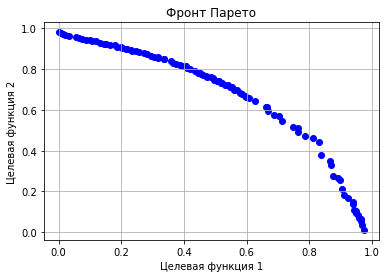

In [12]:
# Визуализация фронта Парето
objectives = [np.array([objective1(ind), objective2(ind)]) for ind in parents]
objectives = np.array(objectives)

plt.scatter(objectives[:, 0], objectives[:, 1], c='blue')
plt.title('Фронт Парето')
plt.xlabel('Целевая функция 1')
plt.ylabel('Целевая функция 2')
plt.grid(True)
plt.show()


3
6
12
24


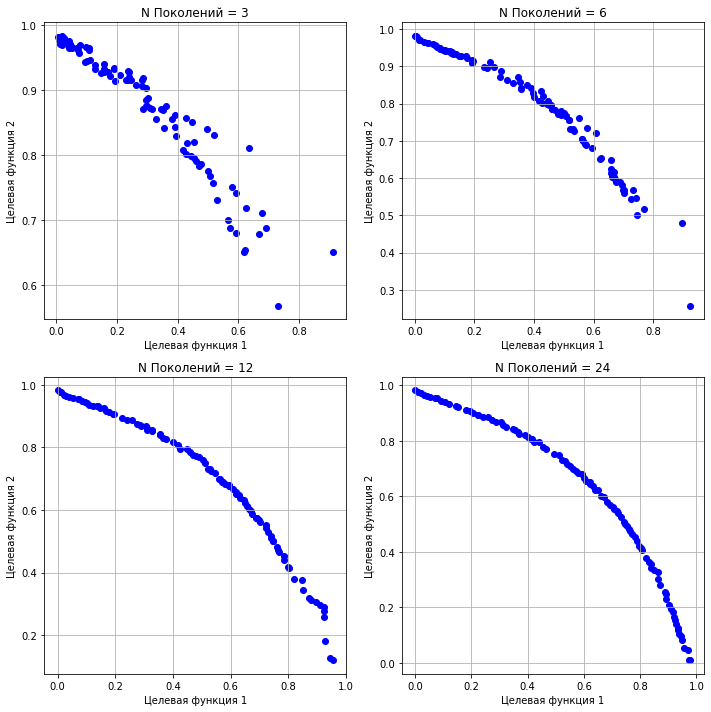

In [16]:
# Функция для визуализации фронта Парето
def plot_pareto_fronts(generation_results, generation_numbers):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    for i, gen in enumerate(generation_numbers):
        objectives = [np.array([objective1(ind), objective2(ind)]) for ind in generation_results[gen]]
        objectives = np.array(objectives)
        axs[i].scatter(objectives[:, 0], objectives[:, 1], c='blue')
        axs[i].set_title(f'N Поколений = {gen}')
        axs[i].set_xlabel('Целевая функция 1')
        axs[i].set_ylabel('Целевая функция 2')
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()

# Словарь для сохранения результатов после каждой генерации
generation_results = {}
checkpoints = [3, 6, 12, 24]

parents = initialize_population(population_size, dimensions)
children = initialize_population(population_size, dimensions)
    
# Основной цикл алгоритма NSGA-II с сохранением результатов на заданных этапах
for i in range(max(checkpoints)):
    #     print(len(parents), len(children))
    population = parents + children
    #     print(len(population[0]))
    parents = select_sorted_items(population, population_size)
    children = []
    for j in range(0, population_size, 2):
        parent1, parent2 = select_sorted_items(parents, 2)
        child1, child2 = crossover(parent1, parent2, crossover_parametr=crossover_parametr)
        child1 = mutate(child1, mutation_parametr=mutation_parametr)
        child2 = mutate(child2, mutation_parametr=mutation_parametr)
        children.extend([child1, child2])

    # Сохраняем результаты после заданных генераций
    if i+1 in checkpoints:
        generation_results[i+1] = parents.copy()
        print(i+1)

# Визуализация результатов для заданных этапов генераций
plot_pareto_fronts(generation_results, checkpoints)
